# 新手教程—收益率计算

以下内容主要介绍收益率计算

## 1 收益率计算

In [1]:
#导入需要的程序包
import pandas as pd
import seaborn as sns

In [2]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
df.head()

,000998.XSHE,002041.XSHE,002772.XSHE,300087.XSHE,300189.XSHE,300511.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,601118.XSHG
2015-01-05,19.44,12.71,NaN,4.00,2.71,NaN,9.51,4.50,8.81,10.92,10.55,11.33,6.28,9.34,8.88
2015-01-06,19.84,12.92,NaN,4.13,2.78,NaN,9.75,4.62,8.75,11.08,10.72,11.62,6.39,9.65,9.15
2015-01-07,19.68,12.85,NaN,4.08,2.76,NaN,9.98,4.70,8.85,11.07,10.70,11.54,6.37,9.68,9.03
2015-01-08,20.22,13.03,NaN,4.18,2.77,NaN,9.77,4.74,8.89,11.12,10.76,11.81,6.39,9.70,8.85
2015-01-09,19.86,12.87,NaN,4.06,2.72,NaN,9.41,4.59,8.60,10.80,10.47,11.73,6.30,9.58,8.61


In [3]:
rets = df/df.shift(1) - 1#shift起平移作用
rets.head()

,000998.XSHE,002041.XSHE,002772.XSHE,300087.XSHE,300189.XSHE,300511.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,601118.XSHG
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.020576,0.016522,NaN,0.032500,0.025830,NaN,0.025237,0.026667,-0.006810,0.014652,0.016114,0.025596,0.017516,0.033191,0.030405
2015-01-07,-0.008065,-0.005418,NaN,-0.012107,-0.007194,NaN,0.023590,0.017316,0.011429,-0.000903,-0.001866,-0.006885,-0.003130,0.003109,-0.013115
2015-01-08,0.027439,0.014008,NaN,0.024510,0.003623,NaN,-0.021042,0.008511,0.004520,0.004517,0.005607,0.023397,0.003140,0.002066,-0.019934
2015-01-09,-0.017804,-0.012279,NaN,-0.028708,-0.018051,NaN,-0.036847,-0.031646,-0.032621,-0.028777,-0.026952,-0.006774,-0.014085,-0.012371,-0.027119


In [4]:
returns = df.pct_change().dropna()
returns.head()

,000998.XSHE,002041.XSHE,002772.XSHE,300087.XSHE,300189.XSHE,300511.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,601118.XSHG


In [5]:
# pandas.ols在0.20已被移除
## 2 移动窗口回归
# 使用普通最小二乘法(OLS)拟合曲线，得到回归系数及各类参数
# y = returns['300087.XSHE']
# x = returns.ix[:, ['300189.XSHE']]
# model = pd.ols(y=y, x=x)
# model
# model = pd.ols(y=y, x=x, window=5)
# model.beta.info()
# model.beta['300189.XSHE'].plot()
# 画出移动平均线、指数平滑移动平均线进行分析

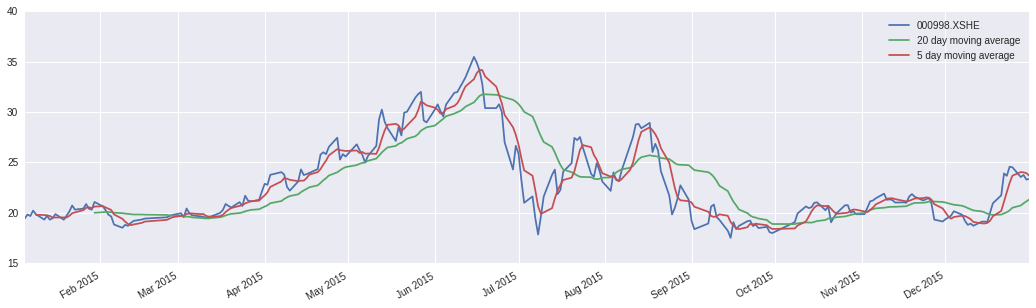

In [6]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
plt.figure(figsize=[18,5])
df['000998.XSHE'].plot()
pd.rolling_mean(df['000998.XSHE'],20).plot(label='20 day moving average')
pd.rolling_mean(df['000998.XSHE'],5).plot(label='5 day moving average')
plt.legend(loc='best')

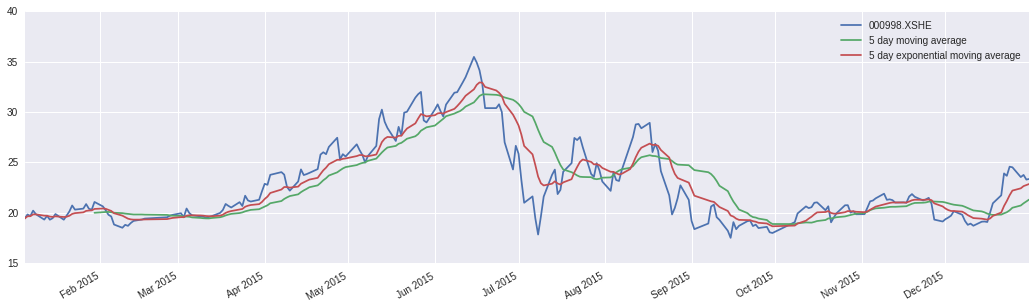

In [7]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
plt.figure(figsize=[18,5])
df['000998.XSHE'].plot()
pd.rolling_mean(df['000998.XSHE'],20).plot(label='5 day moving average')
pd.ewma(df['000998.XSHE'],5).plot(label='5 day exponential moving average')
plt.legend(loc='best')

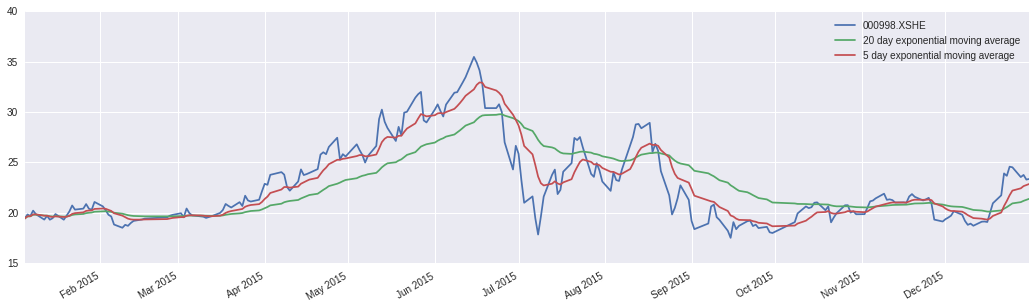

In [8]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
plt.figure(figsize=[18,5])
df['000998.XSHE'].plot()
pd.ewma(df['000998.XSHE'],20).plot(label='20 day exponential moving average')
pd.ewma(df['000998.XSHE'],5).plot(label='5 day exponential moving average')
plt.legend(loc='best')